In [19]:
dataset = "iris.csv"
df = pd.read_csv(dataset)
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [36]:
fields = df.iloc[:, [2,3]].values
print(fields)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

In [28]:
import warnings
warnings.filterwarnings("ignore")               #para ignorar alertas

In [30]:
df_numeric = df.select_dtypes(include=[float, int])      #----> para eliminar Columnas No Numéricas:
fields = df_numeric.values


In [33]:
wcss = [] #lista vacía                           #calcula la inercia tomando en cuenta las distancias de los puntos
          #para generar el gráfico de codo
          #para guardar los errores que se cometen en cada grupo 
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)     #vamos a correr el algoritmo de kmeans
    kmeans.fit(fields) 
    
    wcss.append(kmeans.inertia_)

# Graficación del codo de Jambu

In [37]:
#Se va a encargar de determinar en que momento podemos contemplar el número óptimo de clusters

Text(0, 0.5, 'WCSS')

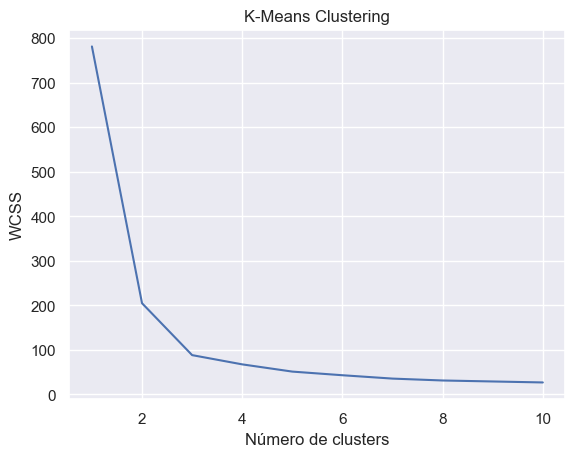

In [38]:
#Graficación 
sb.set()
mp.plot(range(1,11),wcss)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS")     #weighted cluster sum of squares (suma de cuadrados ponderada del grupo)

In [39]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 0 0 2 0 2 2 0 2 0 2 0 0 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 0 0 0 0 2 2 0 0 2 2 2 2 2 0 2 2 4 3 4 3 3 4 0 4 3 4 3
 3 3 3 3 3 3 4 4 0 3 3 4 0 3 4 0 0 3 3 4 4 3 0 3 4 3 3 0 3 3 3 3 4 3 3 3 3
 3 3]


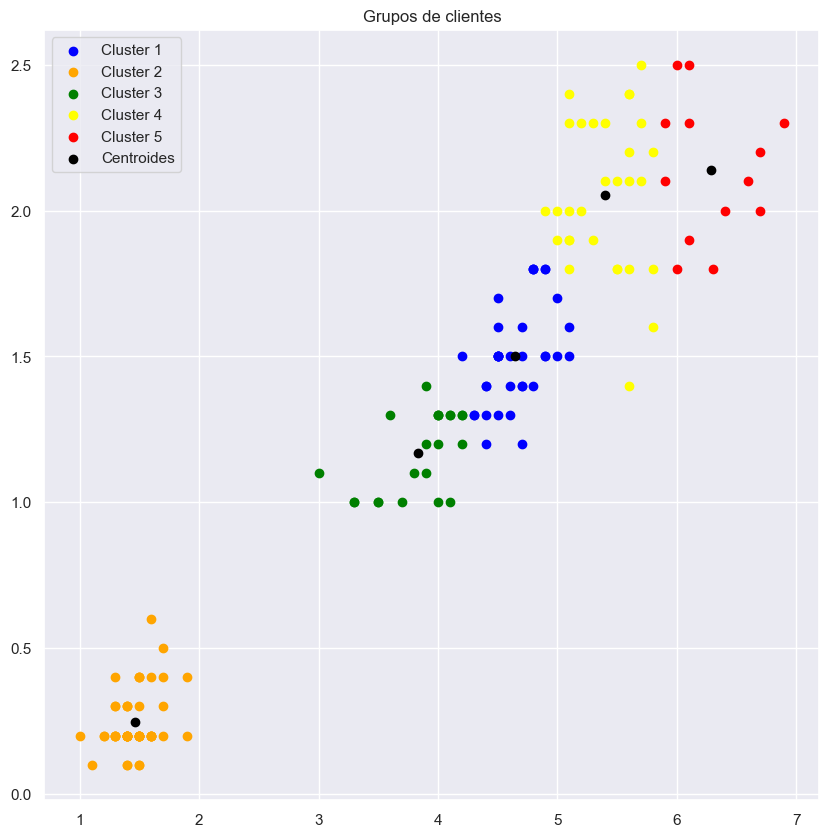

In [40]:
mp.figure(figsize =(10,10))
mp.scatter(fields[cluster_values==0,0], fields[cluster_values==0,1], c = 'blue', label = 'Cluster 1')
mp.scatter(fields[cluster_values==1,0], fields[cluster_values==1,1], c = 'orange', label = 'Cluster 2')
mp.scatter(fields[cluster_values==2,0], fields[cluster_values==2,1], c = 'green', label = 'Cluster 3')
mp.scatter(fields[cluster_values==3,0], fields[cluster_values==3,1], c = 'yellow', label = 'Cluster 4')
mp.scatter(fields[cluster_values==4,0], fields[cluster_values==4,1], c = 'red', label = 'Cluster 5')


#colocar los centroides

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label = 'Centroides')

mp.title("Grupos de clientes")
mp.xlabel = "Annual income"
mp.ylabel = "Spending Score"
mp.legend()

# Criterio de silueta ("Silhouette")

In [45]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [51]:
X = df.iloc[:, [2,3]].to_numpy()
for j in range(2,12):
    kmeans = KMeans(n_clusters = j, random_state = 42)
    kmeans.fit_predict(X)
    
#    Calculamos el Score de Silueta

    score = silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    print("Score Silhouette: ", "k =", j, ":", score)

Score Silhouette:  k = 2 : 0.7653904101258123
Score Silhouette:  k = 3 : 0.6604800083974887
Score Silhouette:  k = 4 : 0.6128714659599253
Score Silhouette:  k = 5 : 0.5883732712110276
Score Silhouette:  k = 6 : 0.5775461720224432
Score Silhouette:  k = 7 : 0.5748225948262903
Score Silhouette:  k = 8 : 0.5902255624998716
Score Silhouette:  k = 9 : 0.5866932137871327
Score Silhouette:  k = 10 : 0.4201050964996262
Score Silhouette:  k = 11 : 0.39391782075470494


# Algoritmo KMeans aplicado a 3 columnas de nuestra base original

# bajo una transformación de PCA

In [53]:
fields2 = df.iloc[:, [1,2,3]].values
print(fields2)

[[3.5 1.4 0.2]
 [3.  1.4 0.2]
 [3.2 1.3 0.2]
 [3.1 1.5 0.2]
 [3.6 1.4 0.2]
 [3.9 1.7 0.4]
 [3.4 1.4 0.3]
 [3.4 1.5 0.2]
 [2.9 1.4 0.2]
 [3.1 1.5 0.1]
 [3.7 1.5 0.2]
 [3.4 1.6 0.2]
 [3.  1.4 0.1]
 [3.  1.1 0.1]
 [4.  1.2 0.2]
 [4.4 1.5 0.4]
 [3.9 1.3 0.4]
 [3.5 1.4 0.3]
 [3.8 1.7 0.3]
 [3.8 1.5 0.3]
 [3.4 1.7 0.2]
 [3.7 1.5 0.4]
 [3.6 1.  0.2]
 [3.3 1.7 0.5]
 [3.4 1.9 0.2]
 [3.  1.6 0.2]
 [3.4 1.6 0.4]
 [3.5 1.5 0.2]
 [3.4 1.4 0.2]
 [3.2 1.6 0.2]
 [3.1 1.6 0.2]
 [3.4 1.5 0.4]
 [4.1 1.5 0.1]
 [4.2 1.4 0.2]
 [3.1 1.5 0.2]
 [3.2 1.2 0.2]
 [3.5 1.3 0.2]
 [3.6 1.4 0.1]
 [3.  1.3 0.2]
 [3.4 1.5 0.2]
 [3.5 1.3 0.3]
 [2.3 1.3 0.3]
 [3.2 1.3 0.2]
 [3.5 1.6 0.6]
 [3.8 1.9 0.4]
 [3.  1.4 0.3]
 [3.8 1.6 0.2]
 [3.2 1.4 0.2]
 [3.7 1.5 0.2]
 [3.3 1.4 0.2]
 [3.2 4.7 1.4]
 [3.2 4.5 1.5]
 [3.1 4.9 1.5]
 [2.3 4.  1.3]
 [2.8 4.6 1.5]
 [2.8 4.5 1.3]
 [3.3 4.7 1.6]
 [2.4 3.3 1. ]
 [2.9 4.6 1.3]
 [2.7 3.9 1.4]
 [2.  3.5 1. ]
 [3.  4.2 1.5]
 [2.2 4.  1. ]
 [2.9 4.7 1.4]
 [2.9 3.6 1.3]
 [3.1 4.4 1.4]
 [3.  4.5 

In [54]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 2)
pca.fit(fields2)
fields2 = pca.transform(fields2)
fields2 

array([[-2.59236698e+00,  1.82790542e-01],
       [-2.54255916e+00, -3.10617064e-01],
       [-2.65421811e+00, -1.17396707e-01],
       [-2.46078490e+00, -2.07792857e-01],
       [-2.60232854e+00,  2.81472063e-01],
       [-2.27992642e+00,  6.21236571e-01],
       [-2.54386575e+00,  9.97549642e-02],
       [-2.49066959e+00,  8.82517068e-02],
       [-2.53259760e+00, -4.09298585e-01],
       [-2.49932457e+00, -2.23438800e-01],
       [-2.52055428e+00,  3.84296270e-01],
       [-2.39893377e+00,  9.23943926e-02],
       [-2.58109883e+00, -3.26263007e-01],
       [-2.85630630e+00, -3.38691064e-01],
       [-2.82564644e+00,  6.67912776e-01],
       [-2.51320588e+00,  1.10635880e+00],
       [-2.64686971e+00,  6.04665827e-01],
       [-2.55382731e+00,  1.98436485e-01],
       [-2.30850453e+00,  5.06909106e-01],
       [-2.49197617e+00,  4.98623735e-01],
       [-2.30719795e+00,  9.65370785e-02],
       [-2.44347494e+00,  4.15588157e-01],
       [-2.96927183e+00,  2.64901320e-01],
       [-2.

In [55]:
wcss2 = [] 
          
    
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)     
    kmeans.fit(fields2) 
    
    wcss2.append(kmeans.inertia_)

TypeError: 'str' object is not callable

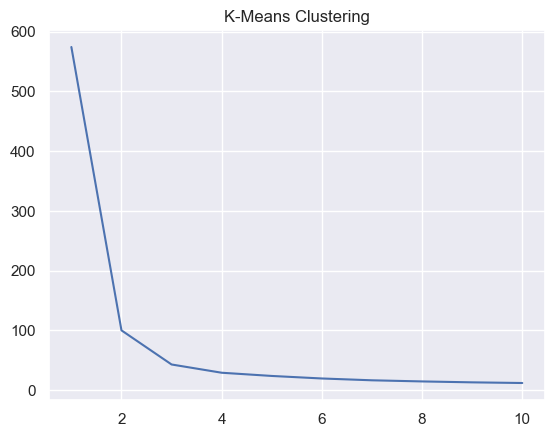

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

#Graficación del "Code de Jambu"

sb.set()
mp.plot(range(1,11),wcss2)
mp.title("K-Means Clustering")
mp.xlabel("Número de clusters")
mp.ylabel("WCSS")  

In [58]:
kmeans = KMeans(n_clusters = 3, init = "k-means++", random_state = 42)
cluster_values = kmeans.fit_predict(fields2)
print(cluster_values)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0]


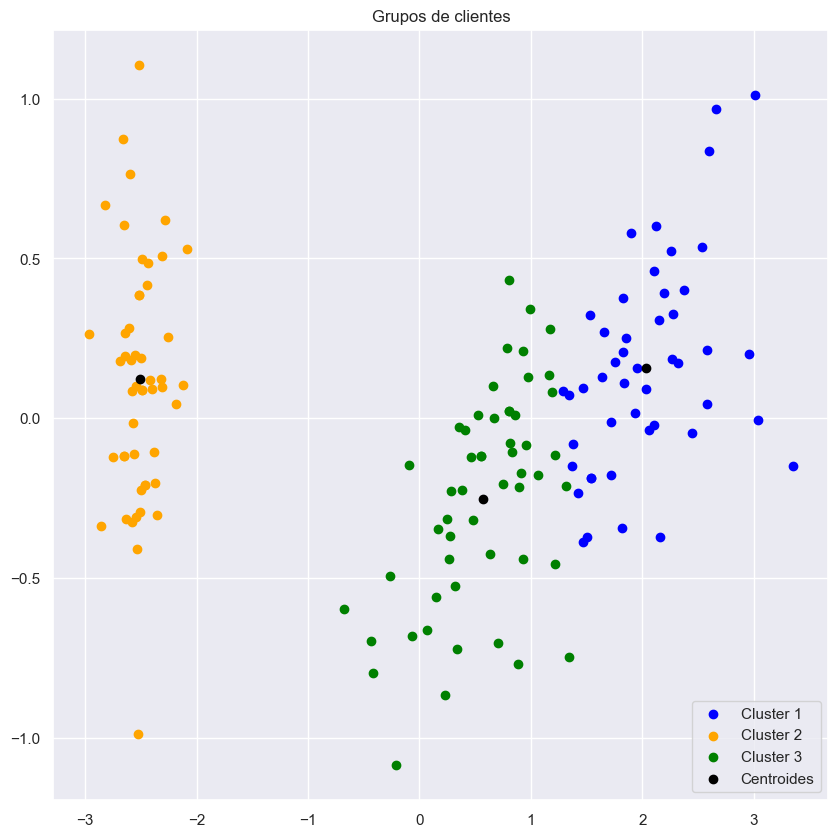

In [60]:
mp.figure(figsize =(10,10))
mp.scatter(fields2[cluster_values==0,0], fields2[cluster_values==0,1], c = 'blue', label = 'Cluster 1')
mp.scatter(fields2[cluster_values==1,0], fields2[cluster_values==1,1], c = 'orange', label = 'Cluster 2')
mp.scatter(fields2[cluster_values==2,0], fields2[cluster_values==2,1], c = 'green', label = 'Cluster 3')


#colocar los centroides

mp.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label = 'Centroides')

mp.title("Grupos de clientes")
mp.xlabel = "Annual income"
mp.ylabel = "Spending Score"
mp.legend()